# Predicting Customer Tip Amount

##Introduction to Problem & Data

### Data Preliminary Examination:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
#load dataset
netflix_data = '/content/tips.csv'
df = pd.read_csv(netflix_data)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
df['total_bill'].min()

3.07

In [ ]:
df['total_bill'].max()

50.81

In [ ]:
df['size'].min()

1

In [ ]:
df['size'].max()

6

## Exploratory Data Analysis

### Statistics

Distribution of tip amount

In [16]:
#min tip
df['tip'].min()

1.0

In [17]:
#max tip
df['tip'].max()

10.0

In [18]:
#median tip
df['tip'].median()

2.9

In [19]:
#mean tip
df['tip'].mean()

2.99827868852459

Text(0.5, 1.0, 'Distribution of Tips Amount')

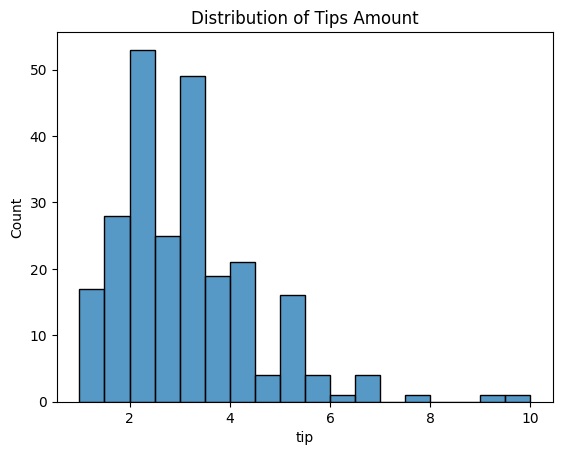

In [15]:
#histogram of tips
sns.histplot(data = df, x = 'tip')
plt.title('Distribution of Tips Amount')

In [3]:
df['tip_percentage'] = (df['tip']/df['total_bill'])*100
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [74]:
#min tip perc
df['tip_percentage'].min()

3.563813585135547

In [75]:
#max tip perc
df['tip_percentage'].max()

71.0344827586207

In [77]:
#mean tip perc
df['tip_percentage'].mean()

16.08025817225047

In [78]:
#median tip perc
df['tip_percentage'].median()

15.476977125802577

Text(0.5, 1.0, 'Distribution of Tips Percentage')

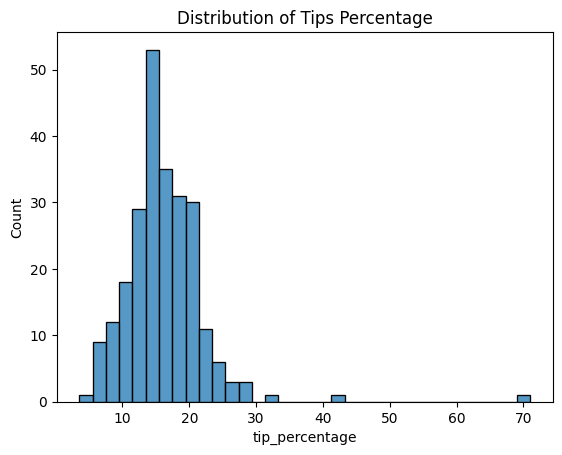

In [79]:
#histogram of tip perc
sns.histplot(data = df, x = 'tip_percentage')
plt.title('Distribution of Tips Percentage')

categorical features

In [80]:
df.describe(include='object').T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


In [ ]:
df['sex'].value_counts()

,count
sex,
Male,157
Female,87


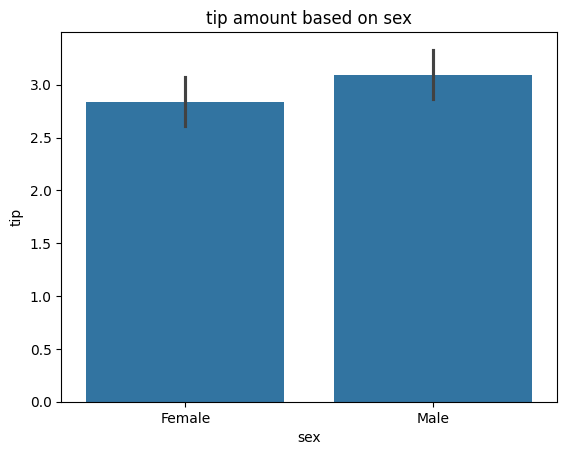

In [9]:
sns.barplot(x = df['sex'], y = df['tip'])
plt.title('tip amount based on sex')
plt.show()

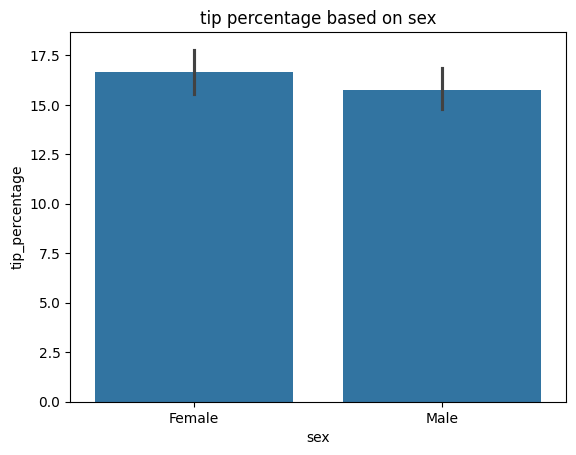

In [10]:
sns.barplot(x = df['sex'], y = df['tip_percentage'])
plt.title('tip percentage based on sex')
plt.show()

In [ ]:
df['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


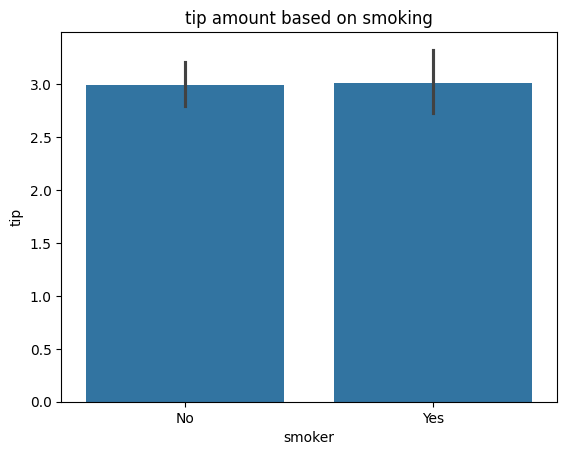

In [11]:
sns.barplot(x = df['smoker'], y = df['tip'])
plt.title('tip amount based on smoking')
plt.show()

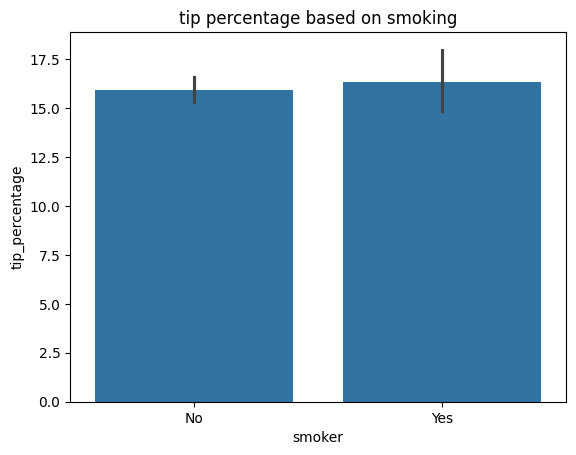

In [12]:
sns.barplot(x = df['smoker'], y = df['tip_percentage'])
plt.title('tip percentage based on smoking')
plt.show()

In [ ]:
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


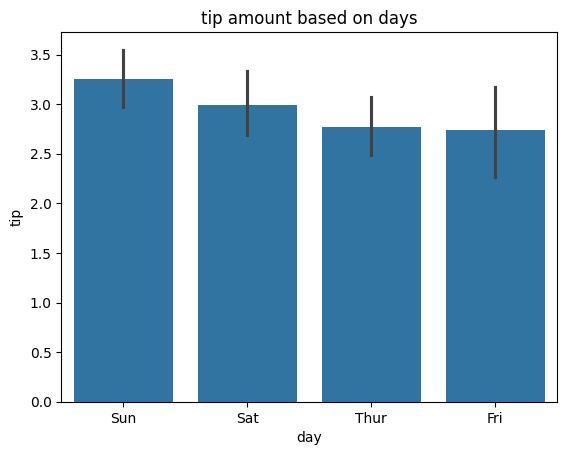

In [13]:
sns.barplot(x = df['day'], y = df['tip'])
plt.title('tip amount based on days')
plt.show()

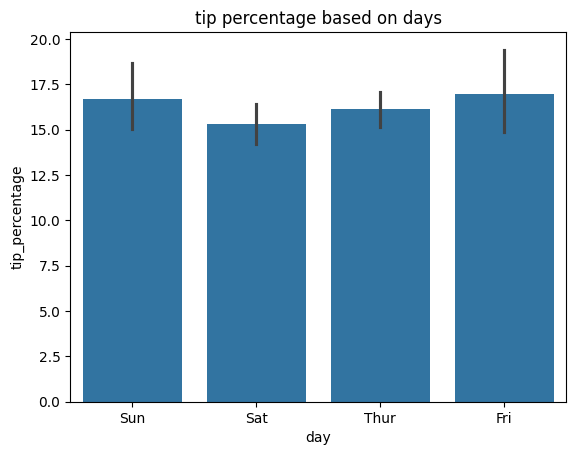

In [14]:
sns.barplot(x = df['day'], y = df['tip_percentage'])
plt.title('tip percentage based on days')
plt.show()

In [ ]:
df['time'].value_counts()

,count
time,
Dinner,176
Lunch,68


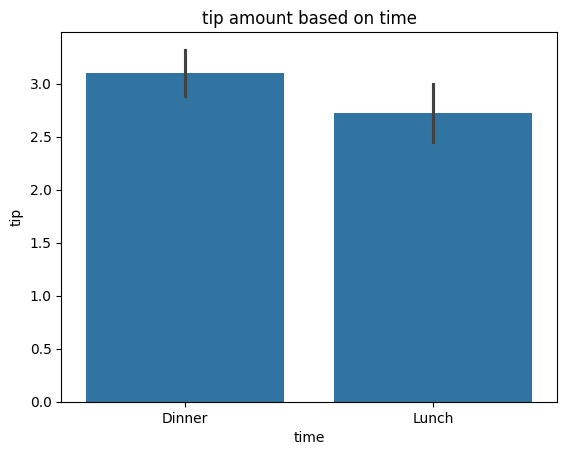

In [15]:
sns.barplot(x = df['time'], y = df['tip'])
plt.title('tip amount based on time')
plt.show()

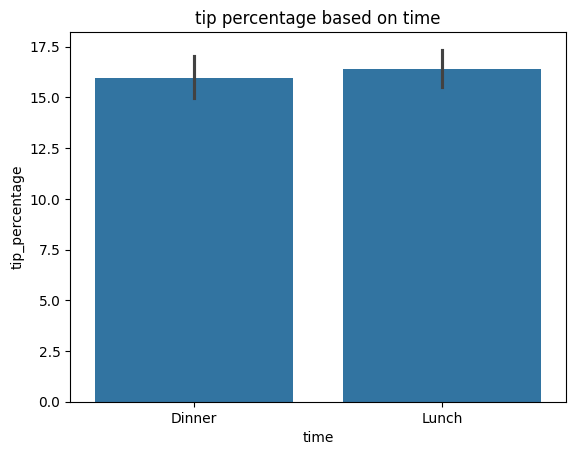

In [16]:
sns.barplot(x = df['time'], y = df['tip_percentage'])
plt.title('tip percentage based on time')
plt.show()

In [5]:
df.groupby(['day', 'sex']).time.value_counts()

day   sex     time  
Fri   Female  Dinner     5
              Lunch      4
      Male    Dinner     7
              Lunch      3
Sat   Female  Dinner    28
      Male    Dinner    59
Sun   Female  Dinner    18
      Male    Dinner    58
Thur  Female  Lunch     31
              Dinner     1
      Male    Lunch     30
Name: count, dtype: int64

numerical features

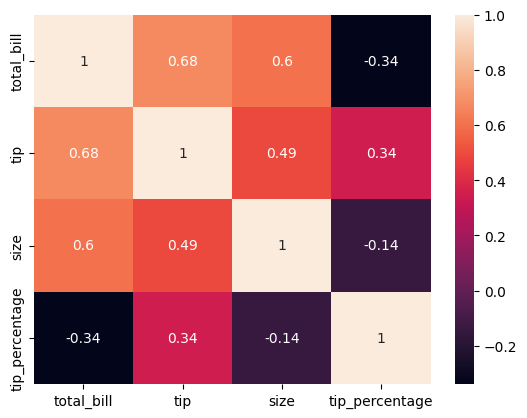

In [81]:
correlation_matrix = df[['total_bill','tip', 'size','tip_percentage']].corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

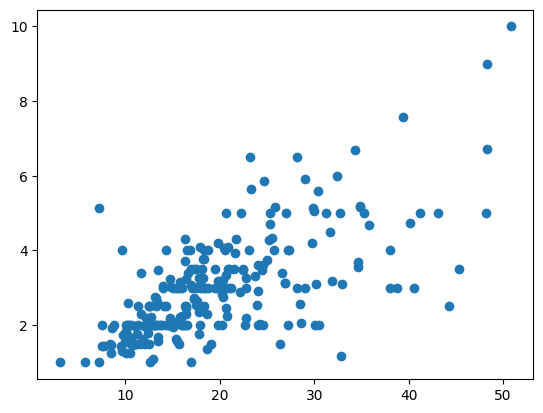

In [12]:
plt.scatter(df["total_bill"], df["tip"])
plt.show()

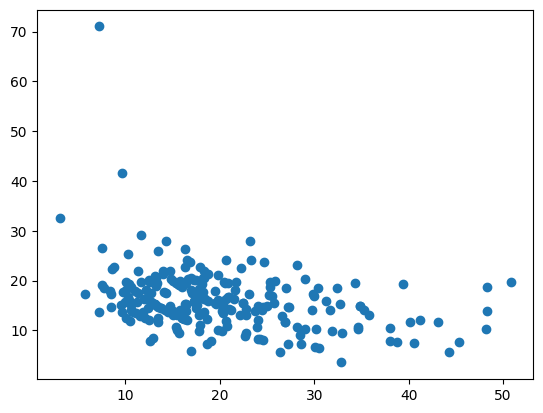

In [84]:
plt.scatter(df["total_bill"], df["tip_percentage"])
plt.show()

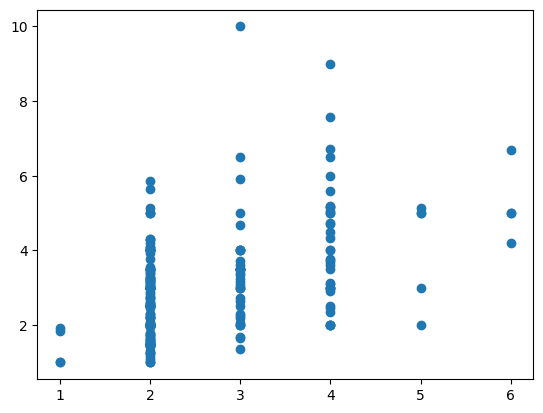

In [13]:
plt.scatter(df["size"], df["tip"])
plt.show()

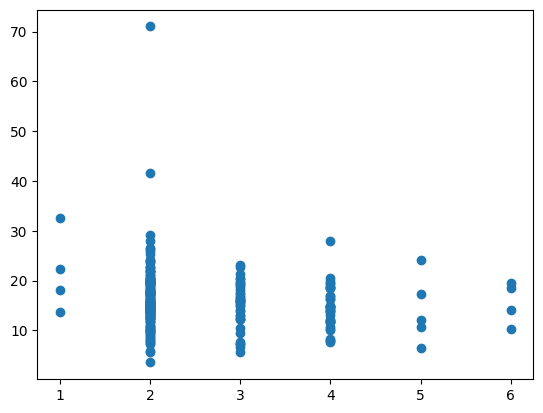

In [83]:
plt.scatter(df["size"], df["tip_percentage"])
plt.show()

## Modeling for Tip Amount

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

### Baseline

In [21]:
#set up baseline model using mean tip, calculate baseline mse
y = df['tip']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

1.9066085124966412

### Multiple Linear Regression

In [22]:
#create X & y, split into training and testing data
X = df[['total_bill', 'sex', 'smoker', 'time','day','size']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [23]:
#encode categorical column
cat_col = ['sex','smoker', 'time','day']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [24]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [25]:
#fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex', 'smoker', 'time',
                                                   'day'])])),
                ('model', LinearRegression())])

In [26]:
#find coefficients
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
onehotencoder__sex_Male,-0.109951
onehotencoder__smoker_Yes,-0.071022
onehotencoder__time_Lunch,0.160656
onehotencoder__day_Sat,-0.078867
onehotencoder__day_Sun,0.038552
onehotencoder__day_Thur,-0.156844
remainder__total_bill,0.095953
remainder__size,0.163868


In [27]:
#find y-int
lr.intercept_

0.7698800343159262

In [28]:
#calculate mse for training data
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.9358709079861434

In [29]:
#calculate mse for testing data
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

1.319629352332072

In [30]:
#determine feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
total_bill,0.717877
sex,-0.001482
smoker,-0.000350
time,-0.000868
day,0.010555
size,0.024672


### KNN

In [31]:
#create X & y, split into training and testing data
X = df[['total_bill', 'sex', 'smoker', 'time','day','size']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [43]:
#encode categorical column & scale data
cat_col = ['sex','smoker', 'time','day']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = StandardScaler())

In [44]:
#create pipeline for knn regression model
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [45]:
#define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}

In [46]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'time',
                                                                          'day'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [47]:
#determine best parameter
grid_search.best_params_

{'model__n_neighbors': 15}

In [48]:
#use 15 neighbors in model
knn = grid_search.best_estimator_

In [49]:
#calculate mse for training data
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.9687851897435896

In [50]:
#calculate mse for testing data
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

1.373788707482993

In [52]:
#determine feature importance
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
total_bill,0.436473
sex,-0.010683
smoker,0.001803
time,0.012840
day,0.013262
size,0.118927


### Decision Tree

In [41]:
#create X & y, split into training and testing data
X = df[['total_bill', 'sex', 'smoker', 'time','day','size']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [42]:
#encode categorical column
cat_col = ['sex','smoker', 'time','day']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,cat_col), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

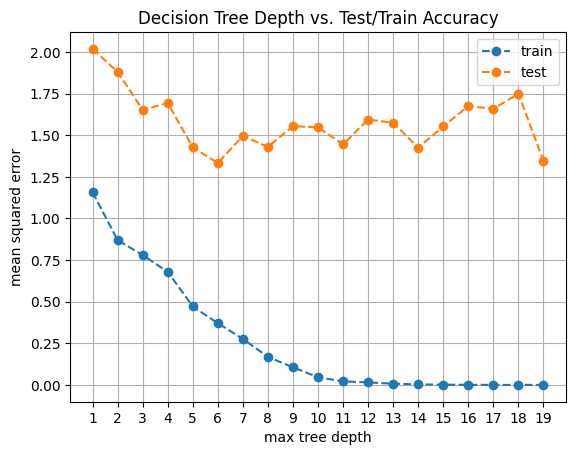

In [53]:
#find the optimal max depth while avoiding overfitting by plotting the test accuracies & finding the minimum one
train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth = d).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');

In [54]:
#fit a decision tree model with a max depth = 6 (lowest mse test score on graph)
dtree = DecisionTreeRegressor(max_depth = 6).fit(X_train_encoded, y_train)

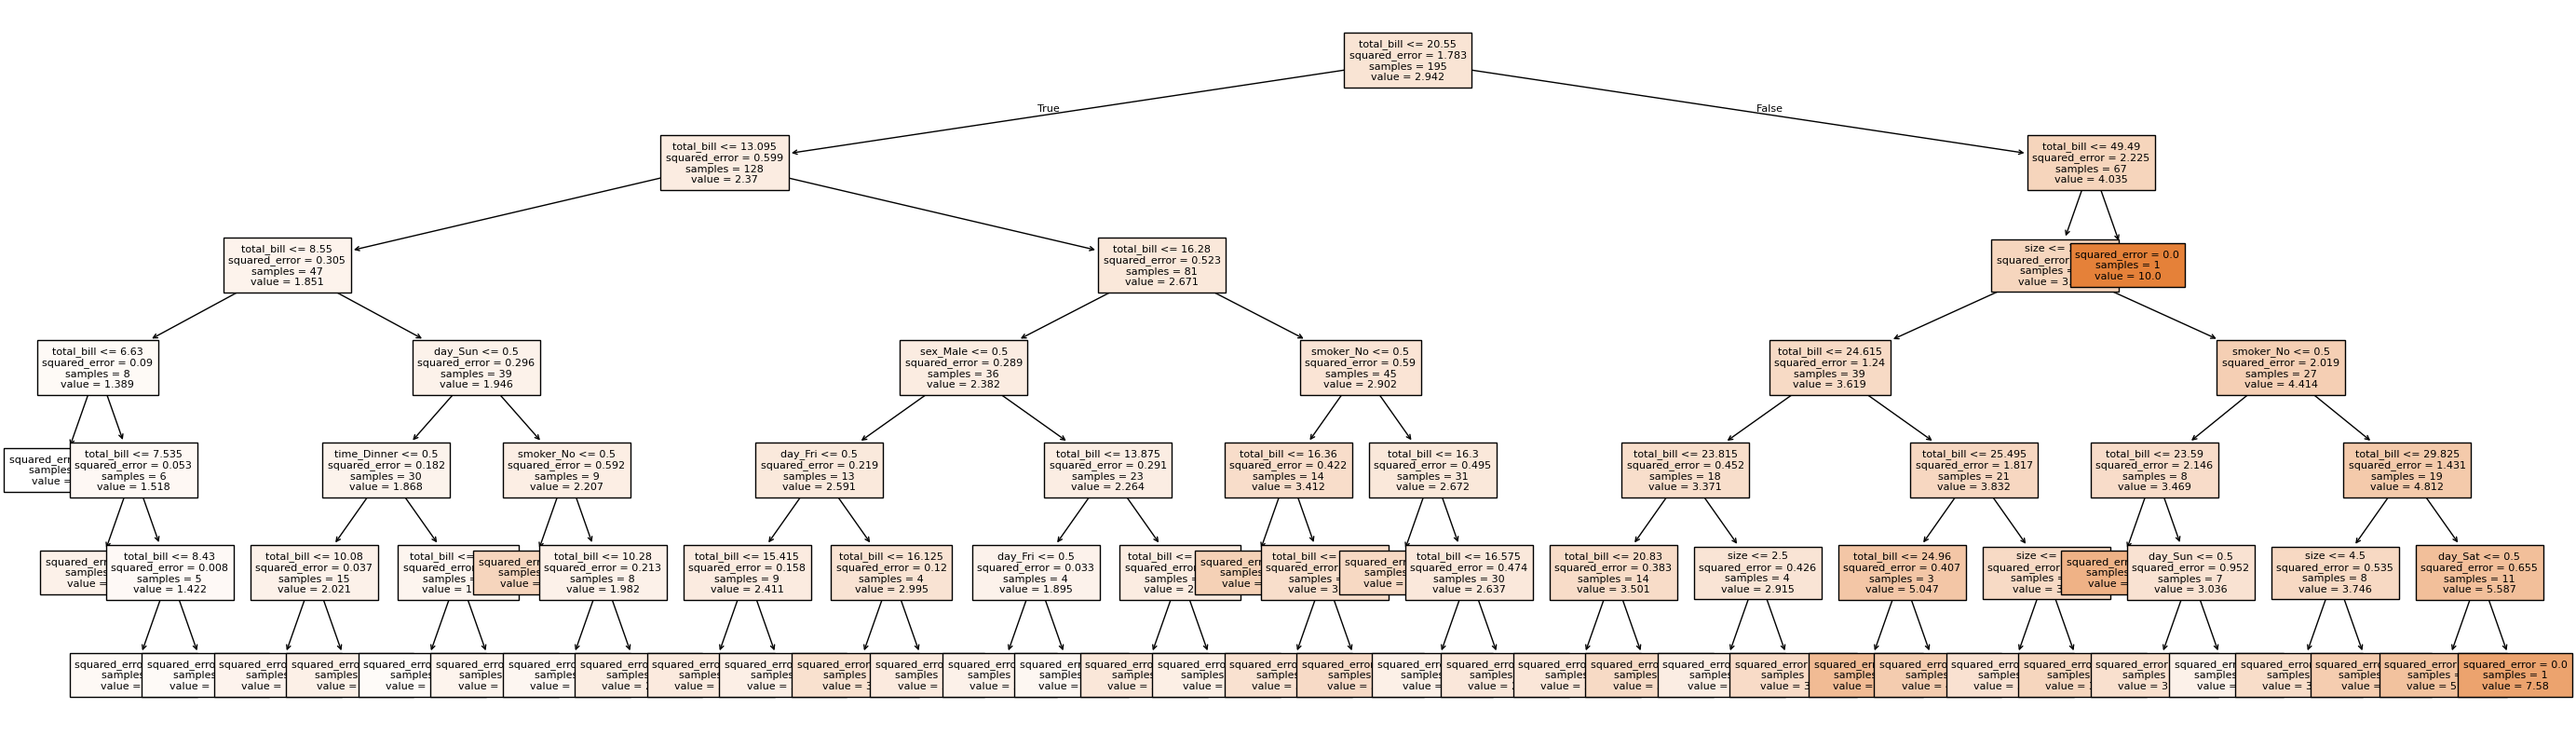

In [59]:
#plot the tree
plt.figure(figsize=(35, 10))
plot_tree(dtree, filled=True, feature_names=encoder.get_feature_names_out().tolist(), fontsize=8);

In [60]:
#calculate mse for training data
y_train_preds = dtree.predict(X_train_encoded)
mean_squared_error(y_train, y_train_preds)

0.3706880320666987

In [61]:
#calculate mse for testing data
y_test_preds = dtree.predict(X_test_encoded)
mean_squared_error(y_test, y_test_preds)

1.11001407784208

In [62]:
#determine feature importance
r = permutation_importance(dtree, X_test_encoded, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = encoder.get_feature_names_out().tolist())

,0
sex_Female,0.000000
sex_Male,-0.004066
smoker_No,0.125451
smoker_Yes,0.000000
time_Dinner,-0.003228
time_Lunch,0.000000
day_Fri,-0.000172
day_Sat,0.116986
day_Sun,0.030101
day_Thur,0.000000


### Random Forest

In [108]:
#create X & y, split into training and testing data
X = df[['total_bill', 'sex', 'smoker', 'time','day','size']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [109]:
#encode categorical column
cat_col = ['sex','smoker', 'time','day']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [110]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

In [111]:
#define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 4, 5, 6, 10]}

In [112]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'time',
                                                                          'day'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [113]:
#determine best parameters
grid_search.best_params_

{'model__max_depth': 3, 'model__n_estimators': 200}

In [114]:
#use max depth of 3 & 200 estimators in model
forest = grid_search.best_estimator_

In [115]:
#calculate mse for training data
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.6890404683966849

In [116]:
#calculate mse for testing data
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

1.1905560344272923

In [117]:
#determine feature importance
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
total_bill,0.940465
sex,0.000566
smoker,0.040579
time,0.001199
day,0.007525
size,0.031324


## Modeling for Tip Percentage

## Baseline

In [86]:
#set up baseline model using mean tip, calculate baseline mse
y = df['tip_percentage']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

37.1452800135469

### Random Forest

In [102]:
#create X & y, split into training and testing data
X = df[['total_bill', 'sex', 'smoker', 'time','day','size']]
y = df['tip_percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

#encode categorical column
cat_col = ['sex','smoker', 'time','day']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

#define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 4, 5, 6, 10]}

#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'time',
                                                                          'day'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [103]:
#determine best parameters
grid_search.best_params_

{'model__max_depth': 3, 'model__n_estimators': 100}

In [104]:
#use max depth of 3 & 100 estimators in model
forest = grid_search.best_estimator_

In [105]:
#calculate mse for training data
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

16.542102370042635

In [106]:
#calculate mse for testing data
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

64.30132903845868

In [107]:
#determine feature importance
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
total_bill,0.286992
sex,-0.003933
smoker,0.032968
time,-0.000224
day,0.028811
size,0.001312
